#Скачиваем данные из эксперимента для нормировки

In [23]:
import numpy as np

file_path = '/content/calibration (1).txt'

array = np.loadtxt(file_path)

print(array.shape)

(50000, 25)


#Смотрим на засветку для всех структур

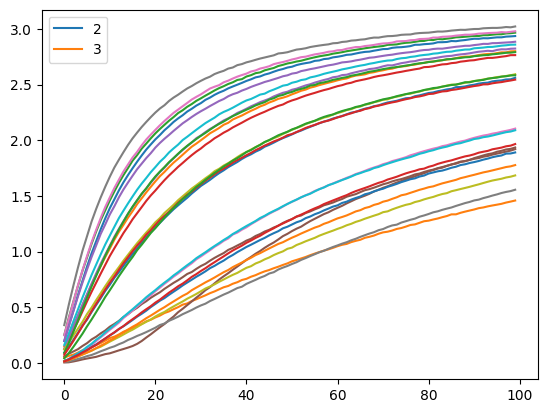

In [24]:
import matplotlib.pyplot as plt

time  = np.arange(0, 100, 1)
res = np.zeros(100)

number_of_struct = np.arange(0, 24, 1)
etalon_struct = 5

for i in range(25):
  if np.isin(i, number_of_struct):
    for j in range(100):
        res[j] = array[j][i]

    plt.plot(time, res)
    plt.legend(f"{i}")
  else:
    pass

#Нормируем по графику - рассматриваем уже первые 12 структур, как и в эксперименте для движения - смотрим на данный и на результат нормировки

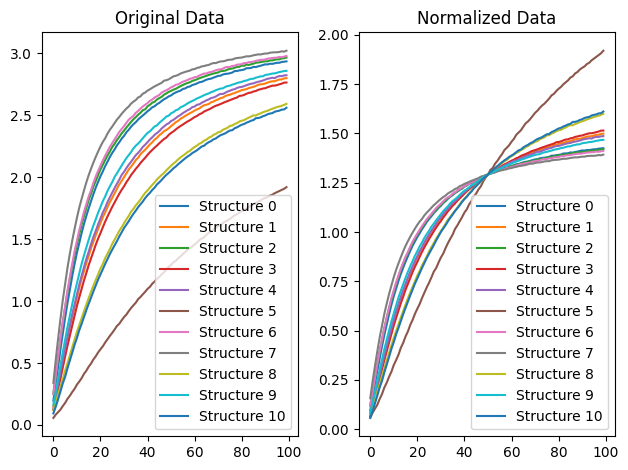

In [25]:
import numpy as np
import matplotlib.pyplot as plt

etalon_struct = 3
time = np.arange(0, 100, 1)
res = np.zeros((100,))
number_of_struct = np.arange(0, 11, 1)
norm_struct = 5  # эталонная структура
norm_time = 50  # момент времени, который выбираем для нормировки
norm = array[norm_time][norm_struct]
legends = []

plt.subplot(1, 2, 1)

for i in range(25):
    if np.isin(i, number_of_struct):
        for j in range(100):
            res[j] = array[j][i]
        plt.plot(time, res)
        legends.append(f"Structure {i}")

plt.legend(legends)
plt.title("Original Data")


plt.subplot(1, 2, 2)

legends = []

for i in range(25):
    if np.isin(i, number_of_struct):
        norm_coeff = norm / array[norm_time][i]
        for j in range(100):
            res[j] = array[j][i] * norm_coeff
        plt.plot(time, res)
        legends.append(f"Structure {i}")

plt.legend(legends)
plt.title("Normalized Data")

plt.tight_layout()
plt.show()


#Обрабатываем эксперимент с движением, учитывая нормировку



Длина эксперементальных данных: 9999


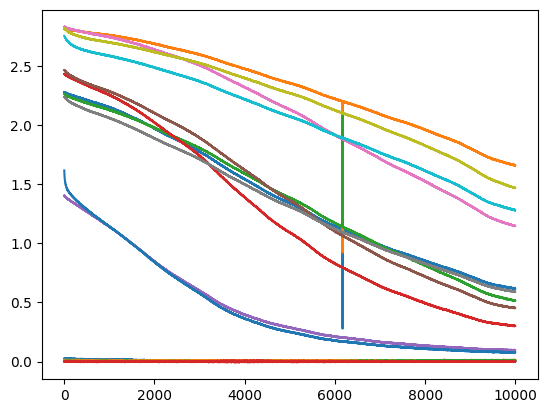

In [26]:
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/motion (1).txt' #скачиваем данные из эксперимента по нормировке

array_mot = np.genfromtxt(file_path, delimiter=' ', skip_footer=1, invalid_raise=False, filling_values=np.nan)

print(f"Длина эксперементальных данных: {len(array_mot)}")




number_of_struct = np.arange(1,25,1)

time  = np.arange(0, len(array_mot) - 1, 1)
res = np.zeros(len(array_mot) - 1)

for i in range(25):
  if np.isin(i, number_of_struct):

    for j in range(len(array_mot) - 1):
        res[j] = array_mot[j][i]

    plt.plot(time, res)
  else:
    pass

## На самом деле нас интересуют только первые точки - остальное вообще не нужно


In [41]:
time = np.arange(0, 100, 1)
res = np.zeros((100,))
number_of_struct = np.arange(0, 11, 1)
norm_struct = 3  # эталонная структура
norm_time = 50  # момент времени, который выбираем для нормировки
norm = array[norm_time][norm_struct]

"""
Функция для получения нормировочного коэффициента. Чтобы отнормировать нужно просто домножить значения проводимости на этот коэффицинет
"""
def norm_coeff(array, norm_struct, norm_time, struct_number):

  norm = array[norm_time][norm_struct]
  return norm / array[norm_time][struct_number]

#res[j] = array[j][i] * norm_coeff

pixel_values_dict = {}
names = ['10 sec', '25 sec', '35 sec', '45 sec']
time = [10, 25, 35, 45]
name_number = 0

for i in range(0, 4, 1):

  p_v = np.empty(3)

  # for z in np.arange(i*3, i*3+3):
  #   print(array_mot[4][z])
  #   p_v = np.append(p_v, array_mot[4][z]*norm_coeff(array, 3, time[name_number], z))
  #   print(p_v)
  # print(p_v)

  p_v = []  # Инициализируем p_v как пустой список.


  for z in np.arange(i * 3, i * 3 + 3):
      print(time[name_number])
      p_v.append(array_mot[4][z] * norm_coeff(array,3, time[name_number], z))


  pixel_values_dict[names[name_number]] = p_v
  name_number += 1

print(pixel_values_dict)

10
10
10
25
25
25
35
35
35
45
45
45
{'10 sec': [1.6808893282383008, 2.1281736495554675, 1.8486522985539484], '25 sec': [2.2643718406849063, 2.28152942892998, 3.3240697159789026], '35 sec': [2.0223609940132046, 2.2295445937647345, 2.611912332819507], '45 sec': [2.627795579346272, 3.1913829060235774, 4.297722497371762]}
